In [1]:
from __future__ import division, print_function
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd
from os import listdir
from os.path import isfile, join

from matplotlib import pyplot as plt
import scipy.io.wavfile as wav


In [7]:
audio_fpath = "/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/recordings/"
audio_clips = os.listdir(audio_fpath)    

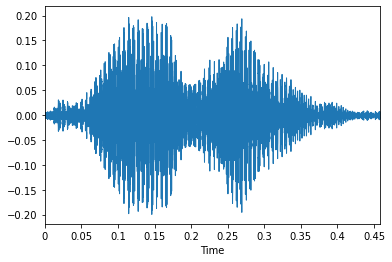

In [8]:
y, sr = librosa.load(audio_fpath+audio_clips[3])
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

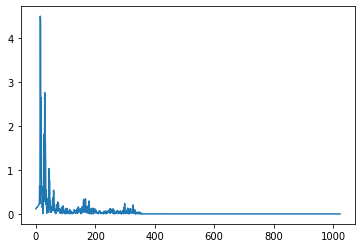

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

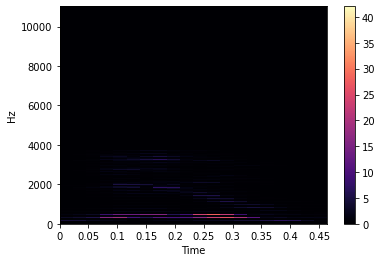

In [10]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

D:\Anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


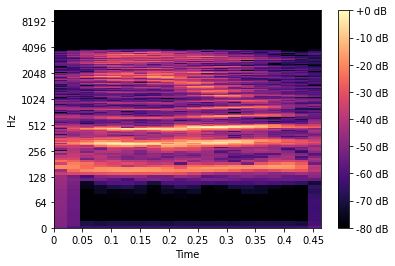

In [11]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [3]:
import os
from shutil import copyfile

# As per README:
# All files of iteration 0-4 move to testing-spectrograms
# All files of iteration 5-9 move to validation-spectrograms
# All files of iteration 10-49 move to training-spectrograms

def separate(source):
    for filename in os.listdir(source):
        first_split = filename.rsplit("_", 1)[1]
        second_split = first_split.rsplit(".", 1)[0]
        if int(second_split) <= 4:
            copyfile(source + "/" + filename, "/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/record-testing" + "/" + filename)
        elif int(second_split)>=5 and int(second_split)<=9:
            copyfile(source + "/" + filename, "/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/record-valid" + "/" + filename)
        else:
            copyfile(source + "/" + filename, "/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/record-training" + "/" + filename)
                

if __name__ == '__main__':
    separate("/Users/Krutika/Downloads/asr/free-spoken-digit-dataset-master/recordings/")